Problem Statement :
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply

Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

1.Store-Store number
2.Date-Week of Sales
3.Weekly_Sales-Sales for the given store in that week
4.Holiday_Flag-If it is a holiday week
5.Temperature-Temperature on the day of the sale
6.Fuel_Price -Cost of the fuel in the region
7.CPI-Consumer Price Index
8.Unemployment -Unemployment Rate


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv("Walmart DataSet.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%Y")
print("olumn 'Date' already has data type", data["Date"].dtypes)

olumn 'Date' already has data type datetime64[ns]


In [ ]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
# Unique values for each feature
data.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [ ]:
#checking the duplicates value
data[data.duplicated() == True]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [ ]:
# Extract information from Date into columns

data["Day"] = data["Date"].dt.day # Extract day of month
data["DayOfWeek"] = data["Date"].dt.weekday # Extract day of week
data["Month"] = data["Date"].dt.month # Extract month
data["Year"]  = data["Date"].dt.year # Extract year
data["WeekOfYear"] = data["Date"].dt.isocalendar().week # Extract week of year

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,DayOfWeek,Month,Year,WeekOfYear
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,4,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,4,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,4,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,4,3,2010,9


In [ ]:
#
def get_store_df(store_num):
    return data[data['Store'] == store_num]
get_store_df(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,DayOfWeek,Month,Year,WeekOfYear
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,4,2,2010,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,4,2,2010,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,4,2,2010,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,4,2,2010,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,4,3,2010,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,28,4,9,2012,39
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,5,4,10,2012,40
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,12,4,10,2012,41
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,19,4,10,2012,42


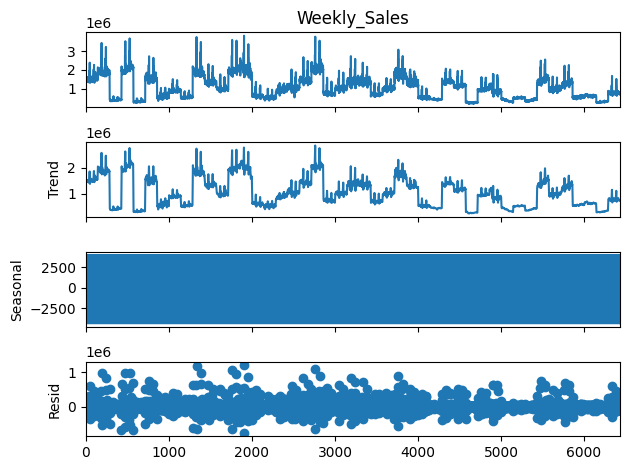

<Figure size 3000x800 with 0 Axes>

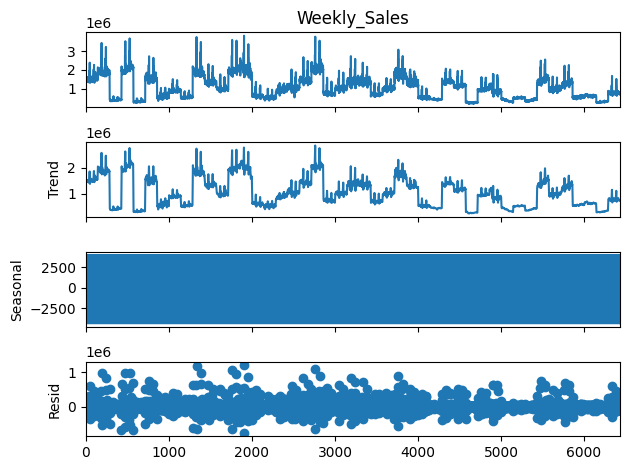

In [ ]:
# plot seasonal decompose for dataset
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize =(30,8))
store_sales_sum= data.groupby(data.index)[['Weekly_Sales']].sum()
store_sales_sum.sort_index(ascending = True, inplace =True)
seasonal_decompose(store_sales_sum['Weekly_Sales'], period =4, model ='additive').plot()

In [ ]:
# let's calculate the correlation of each store with CPI, Unemployment, Fuel_Price and Temperature
store_df_corr = pd.DataFrame(columns= ['Store','Weekly_Sales','Holiday_Flag','Temperature',
                                        'Fuel_Price','CPI','Unemployment'])
for store_num in data['Store'].unique():
    store_df = get_store_df(store_num)
    # calculate the correlation of each store weekly sales with all attributes
    # take the transpose and drop 'Store' as it does not make any sense,
    # and 'Weekly_Sales' gives correlation 1 as it is self correlation
    store_df_corr = store_df_corr.assign(**{'store_weekly_sales_' + str(store_num): store_df.corr()['Weekly_Sales'].to_list()})


store_df_corr = store_df_corr.drop(['Weekly_Sales', 'Store'], axis = 1)
store_df_corr.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,store_weekly_sales_1,store_weekly_sales_2,store_weekly_sales_3,store_weekly_sales_4,store_weekly_sales_5,...,store_weekly_sales_36,store_weekly_sales_37,store_weekly_sales_38,store_weekly_sales_39,store_weekly_sales_40,store_weekly_sales_41,store_weekly_sales_42,store_weekly_sales_43,store_weekly_sales_44,store_weekly_sales_45
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.214539,-0.070466,0.308188,0.358701,0.303356,...,-0.942481,0.241475,0.804105,0.451673,0.116239,0.422324,0.327037,-0.360795,0.787497,-0.015683
2,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,NaN,NaN,NaN,NaN,NaN,0.194905,0.177726,0.208556,0.153388,0.302525,...,-0.026605,-0.143336,-0.027163,0.127115,0.101524,0.097854,0.061810,0.017768,-0.074599,0.106357
4,NaN,NaN,NaN,NaN,NaN,-0.222701,-0.297673,-0.377524,-0.225583,-0.175517,...,-0.094454,-0.300493,0.032993,0.064738,0.090598,0.106761,-0.151639,0.095272,0.267822,-0.201945


In [ ]:
# using type annotation in python to define parameters and return value datatypes
def get_positive_negative_corr(col_name:str)->(pd.DataFrame, pd.DataFrame):
    pos_corr = store_df_corr[store_df_corr[col_name] > 0].sort_values(by = col_name, ascending = False)
    pos_corr_store = [ int(i[3]) for i in pos_corr.index.str.split("_")]
    print(f'''{len(pos_corr_store)} stores exhibits the +ve correlation between weekly sales and {col_name}:
                {pos_corr_store }\n''')
    neg_corr = store_df_corr[store_df_corr[col_name] < 0].sort_values(by = col_name,ascending = True)
    neg_corr_store = [ int(i[3]) for i in neg_corr.index.str.split("_")]
    print(f'''{len(neg_corr_store)} stores exhibits the -ve correlation between weekly sales and {col_name}:
          {neg_corr_store}\n''')
    return pos_corr, neg_corr

In [ ]:
def plot_positive_negative_corr(pos_corr_df:pd.DataFrame, neg_corr_df:pd.DataFrame, col_name:str) ->None:
    plt.figure(figsize = (24,8))
    pos_corr_df = pos_corr_df.sort_values(by = col_name, ascending = True)
    corr_all = pd.concat([neg_corr_df, pos_corr_df], axis = 0)
    ax = sns.barplot(x = corr_all.index, y = corr_all[col_name])

    plt.title(f"Impact of {col_name} on Store's Weekly Sales", va = 'top', fontsize = 15)
    plt.xticks(rotation = 67, fontsize = 15)
    plt.xlabel("Store Number", fontsize = 15)
    plt.ylabel(f"Correlation between Weekly Sales and col_name", fontsize = 15)

You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:
a) If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


<Figure size 1000x500 with 0 Axes>

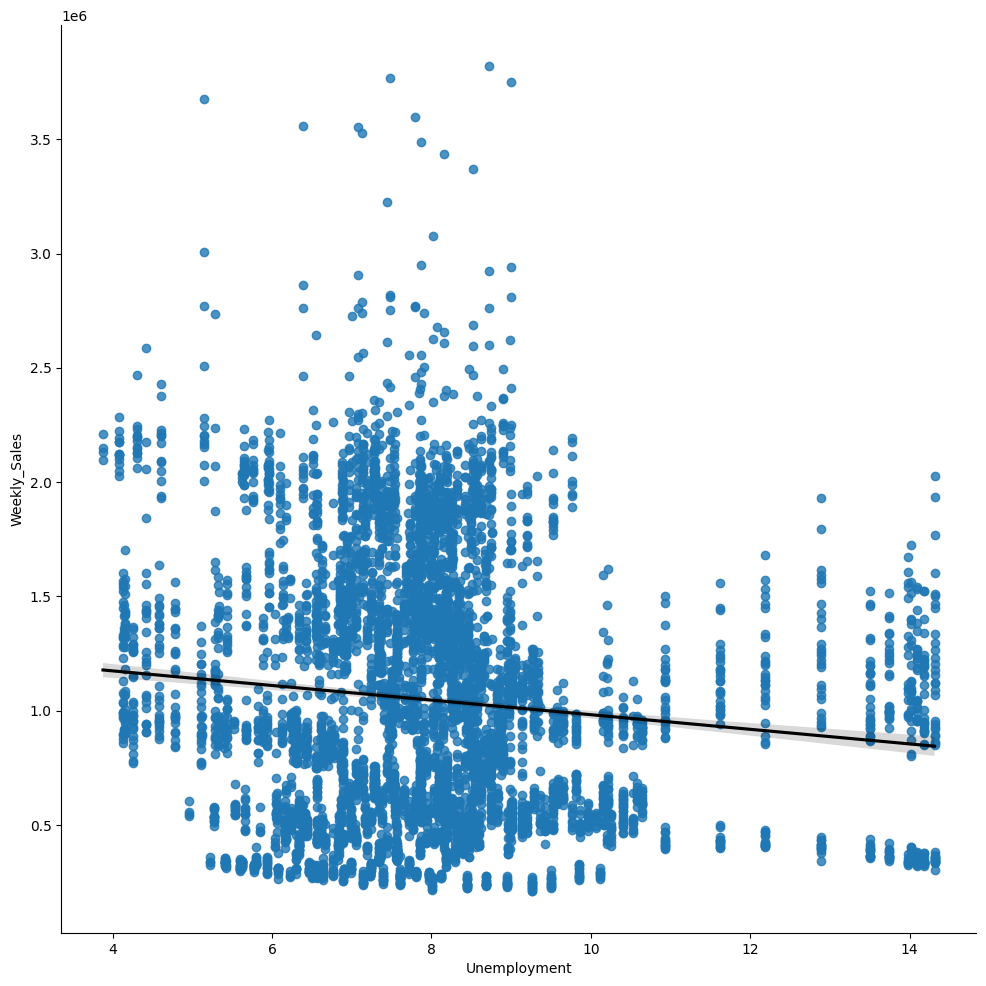

In [ ]:
plt.figure(figsize=(10,5)) #set graph dimensions
ax = sns.pairplot(data=data, y_vars=['Weekly_Sales'], x_vars= ['Unemployment'], kind='reg', height = 10,plot_kws={'line_kws':{'color':'black'}})
plt.show()

b)If the weekly sales show a seasonal trend, when and what could be the reason?

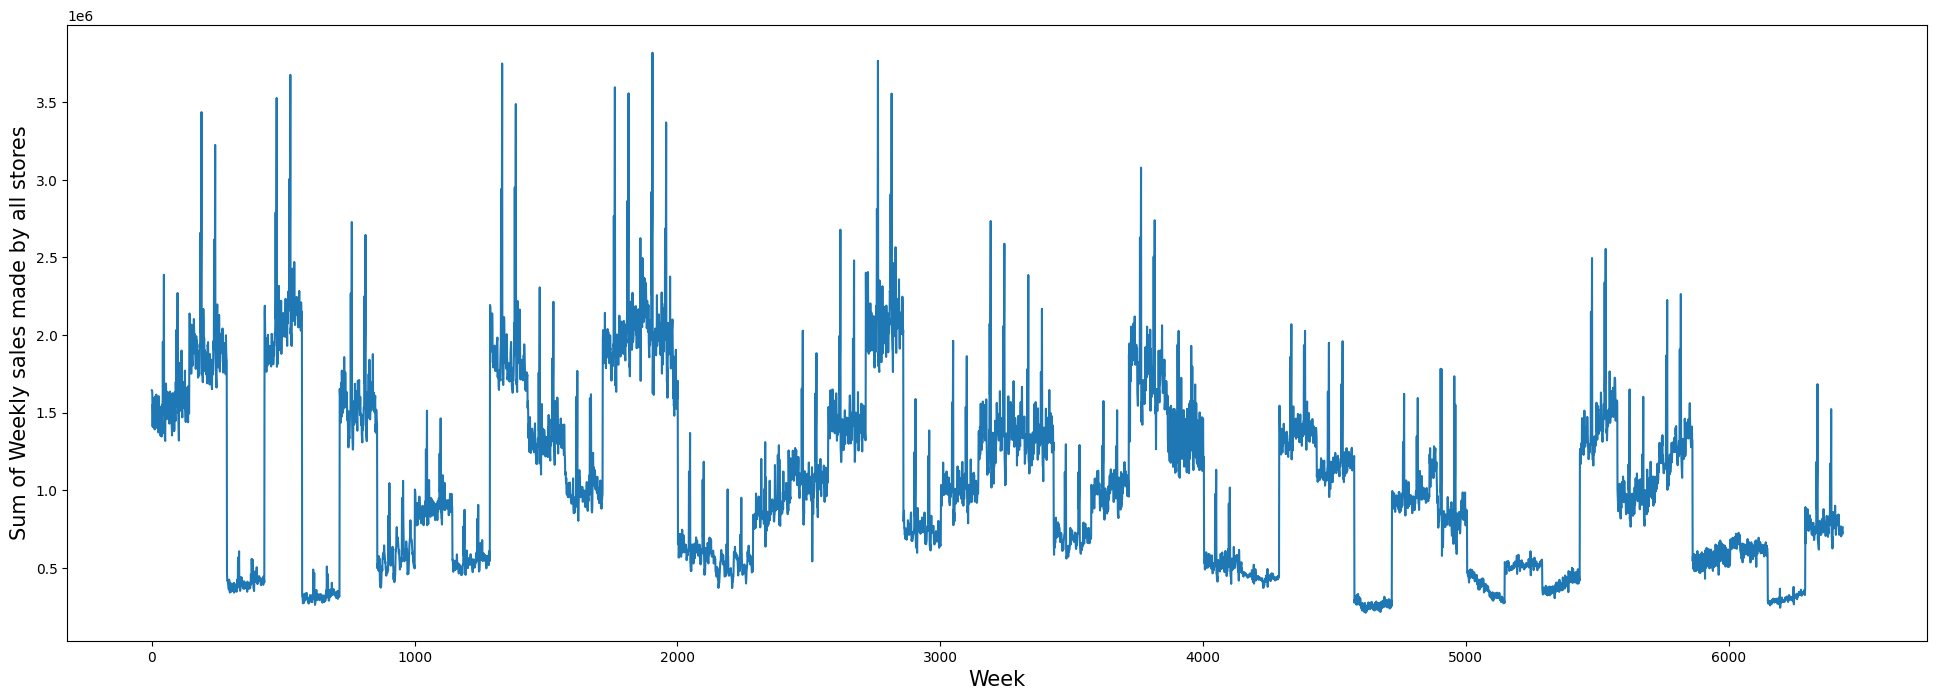

In [ ]:
def weekly_sales():
    grouped_weekly_sales = data.groupby(data.index).agg(total_sales = ('Weekly_Sales', 'sum'))
    plt.figure(figsize = (24,8))
    sns.lineplot(x = grouped_weekly_sales.index, y =grouped_weekly_sales['total_sales'])
    plt.xlabel("Week", fontsize= 15)
    plt.ylabel("Sum of Weekly sales made by all stores", fontsize= 15)
weekly_sales()

c) Does temperature affect the weekly sales in any manner?

<Figure size 1000x500 with 0 Axes>

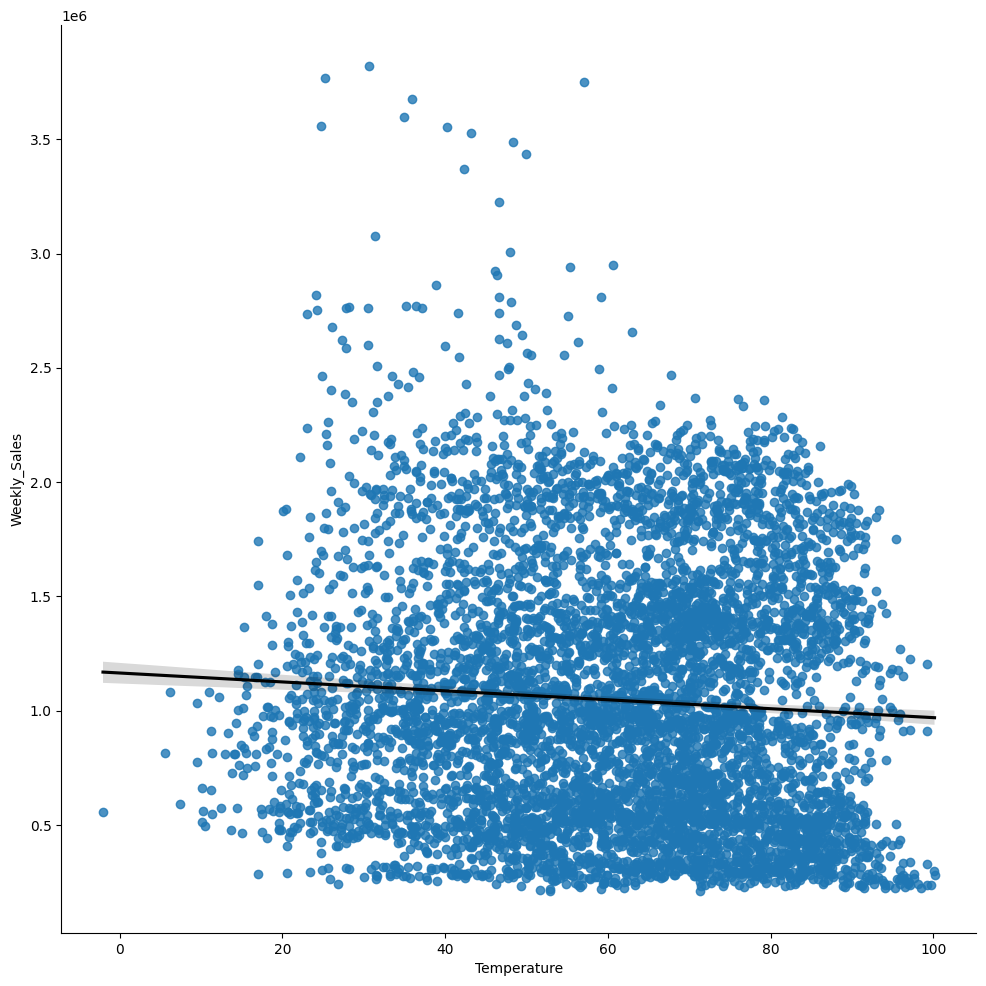

In [ ]:
plt.figure(figsize=(10,5)) #set graph dimensions
ax = sns.pairplot(data=data, y_vars=['Weekly_Sales'], x_vars= ['Temperature'], kind='reg', height = 10,plot_kws={'line_kws':{'color':'black'}})
plt.show()



d)How is the Consumer Price index affecting the weekly sales of various stores?

<Figure size 1000x500 with 0 Axes>

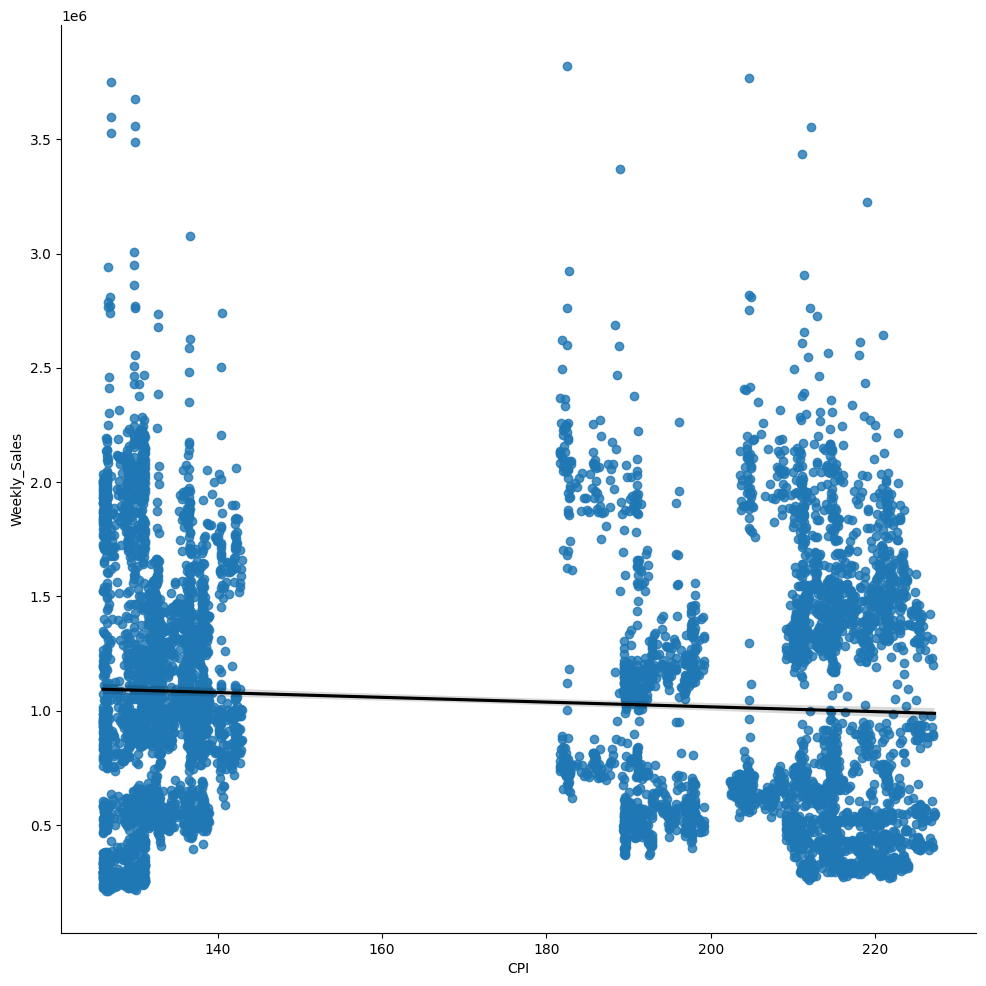

In [ ]:
plt.figure(figsize=(10,5)) #set graph dimensions
ax = sns.pairplot(data=data, y_vars=['Weekly_Sales'], x_vars= ['CPI'], kind='reg', height = 10,plot_kws={'line_kws':{'color':'black'}})
plt.show()

e)Top performing stores according to the historical data

In [ ]:
import pandas as pd

#Average sales data by store
store_performance = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

#Rank stores based on total sales
top_stores_total_sales = store_performance.sort_values(by='Weekly_Sales',ascending =False)

#Display the top -Performing stores based on total sales
print("Top -Performing stores based on total sales:")
print(top_stores_total_sales)


Top -Performing stores based on total sales:
    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689

f) The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

In [ ]:
#Aggregate sales data by store
store_performance=data.groupby('Store')['Weekly_Sales'].sum().reset_index()
#Rank stores based on total sales in descending order(from lowest to highest)
worst_store_total_sales = store_performance.sort_values(by='Weekly_Sales',ascending = True)
#Display the worst performing store based on total sales
print("worst-performing store based on total sales:")
print(worst_store_total_sales.head(1)) #Display the store with lowest total sales

worst-performing store based on total sales:
    Store  Weekly_Sales
32     33   37160221.96


In [27]:
data_store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [28]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = data_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
# Looking the dataframe
top_10_Sale_Store

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [30]:
Bottom_10_Sale_Store = data_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store # Lokking at the data

,Store,Weekly_Sales
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
37,38,55159626.42
2,3,57586735.07
29,30,62716885.12
36,37,74202740.32
15,16,74252425.40
28,29,77141554.31


2.Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [33]:
from scipy.stats import ttest_ind # Importing the ttest_ind.. this helps us to compare mean between the two indipendent groups
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [34]:
# Interpret results
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 9.659870792842347e-13


In [35]:
mean_difference = top_sales.mean() - worst_sales.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: 205051873.43799996


In [36]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [37]:
# Excluding all the varibales.. and considering the date and sales data for model building
data_stores_sales =data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [38]:
data_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index

In [ ]:
scaler=standardscaler()
X_scaled=scaler.fit_transform()

In [ ]:
#Get Target data
y = data[‘Weekly_sales’]
#Load X Variables into a Pandas Dataframe with columns
X = data.drop(['Weekly_sales'], axis = 1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from statsmodels.tsa.stattools import adfuller # importing the adfuller for check the data stationarity

In [40]:
# check for stationarity
def adf_test(series, title=''): # creating a function

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [42]:
adf_test(data_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.655815
p-value                   0.082001
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [43]:
# Importing the seasonal decompose for break down the components of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
decomposition=seasonal_decompose(data_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


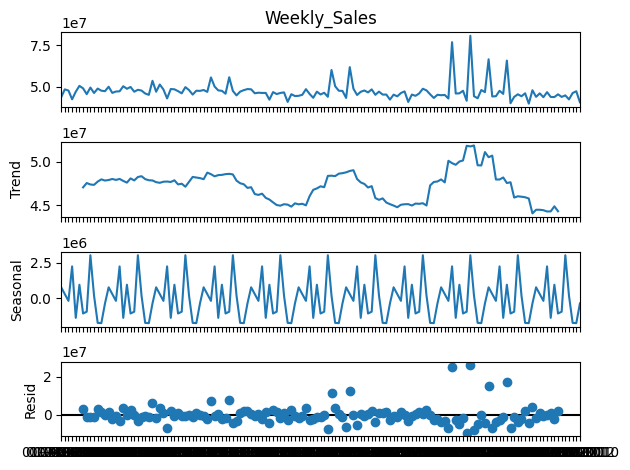

In [45]:
print(decomposition.plot())# Plotting the components of the data

In [46]:
mean1=data_stores_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=data_stores_sales.rolling(window=10).std() # Creating the Rolling standard deviation

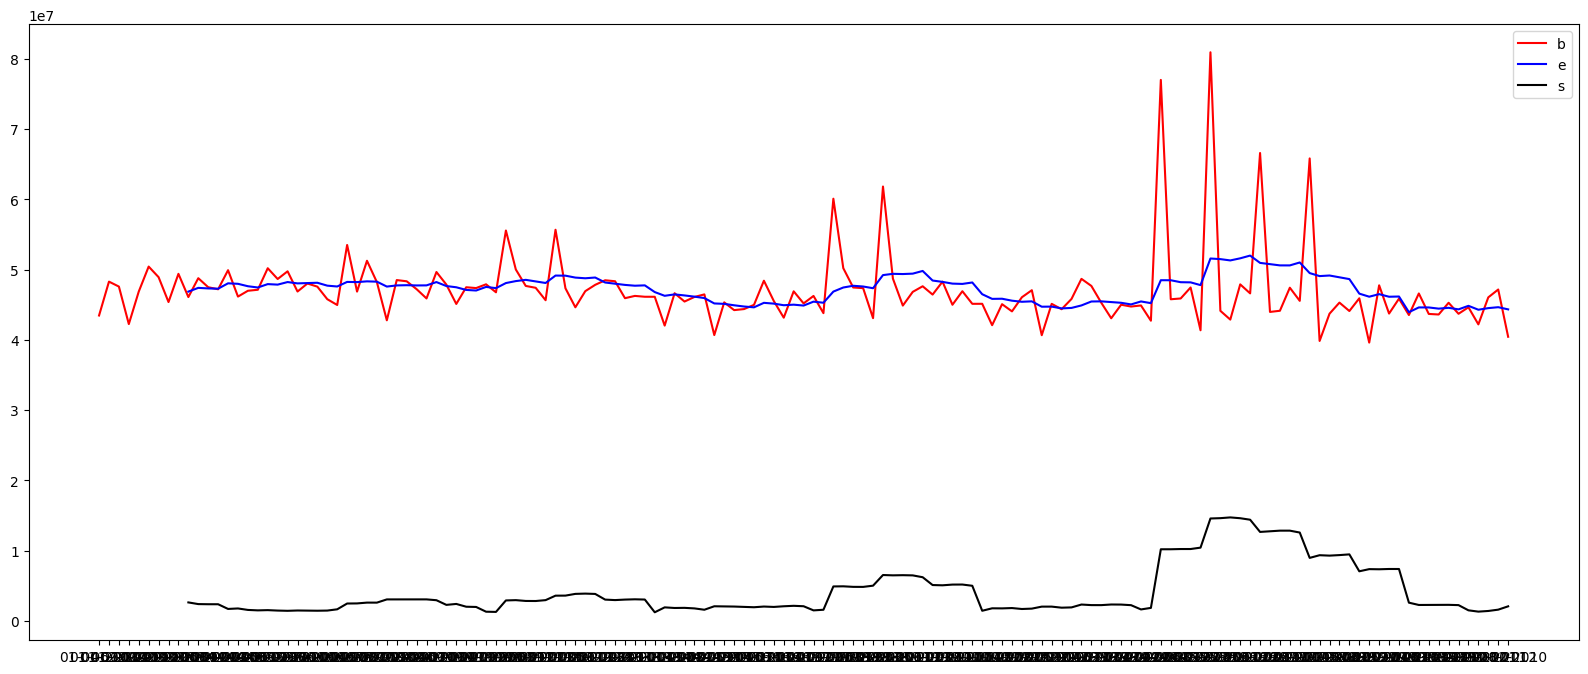

In [48]:
plt.figure(figsize=(20,8))
orig=plt.plot(data_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

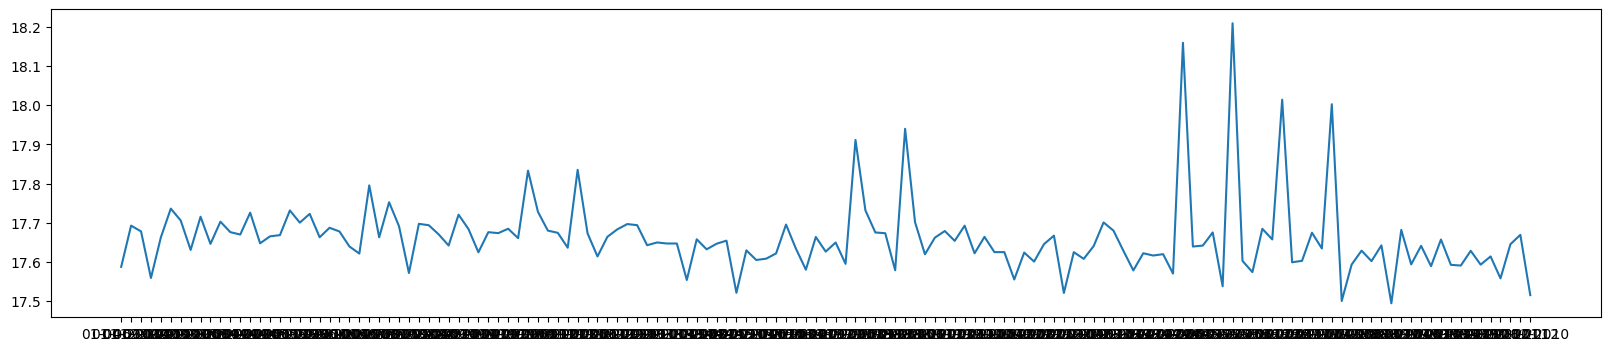

In [51]:
data_log = np.log(data_stores_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(data_log)

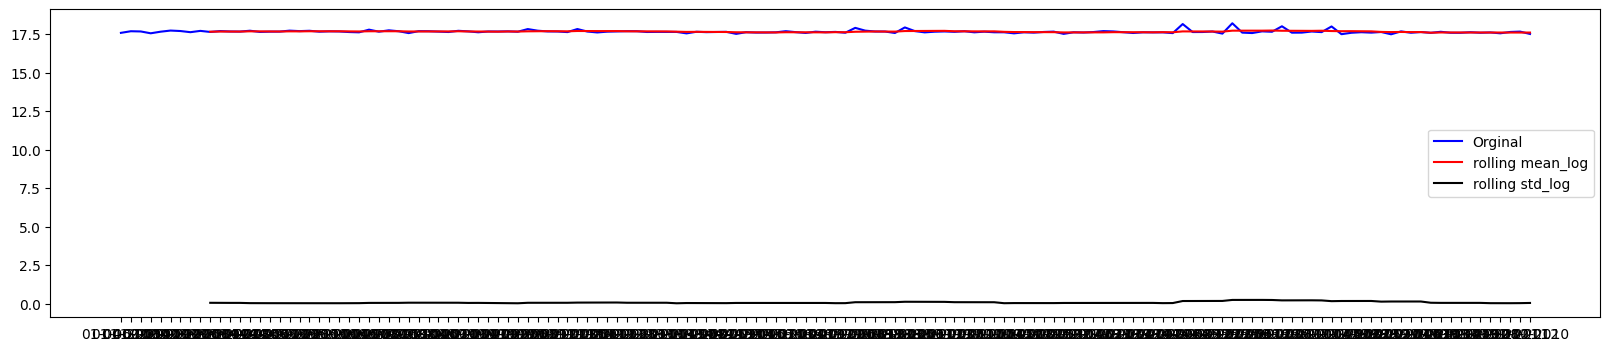

In [52]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation are colse
mean_log = data_log.rolling(window = 10).mean()
std_log = data_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(data_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [53]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
data_new = data_log - mean_log
data_new.head(20)

,Weekly_Sales
Date,
01-04-2011,NaN
01-06-2012,NaN
01-07-2011,NaN
01-10-2010,NaN
02-03-2012,NaN
02-04-2010,NaN
02-07-2010,NaN
02-09-2011,NaN
02-12-2011,NaN


In [54]:
data_new.dropna(inplace = True) # dropping the nan values

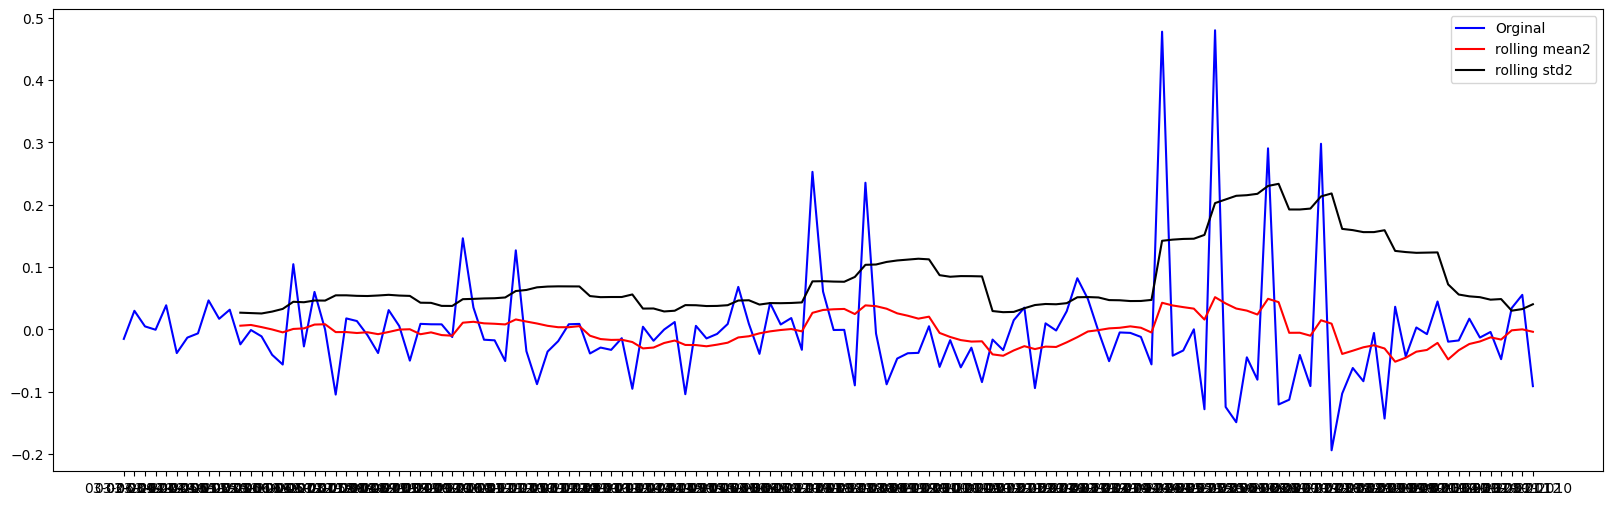

In [55]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = data_new.rolling(window = 12).mean()
std2 = data_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(data_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [56]:
adf_test(data_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -3.567603
p-value                   0.006411
# lags used               4.000000
# observations          129.000000
critical value (1%)      -3.482088
critical value (5%)      -2.884219
critical value (10%)     -2.578864
Rejects the null hypothesis
Data has no unit root and is stationary


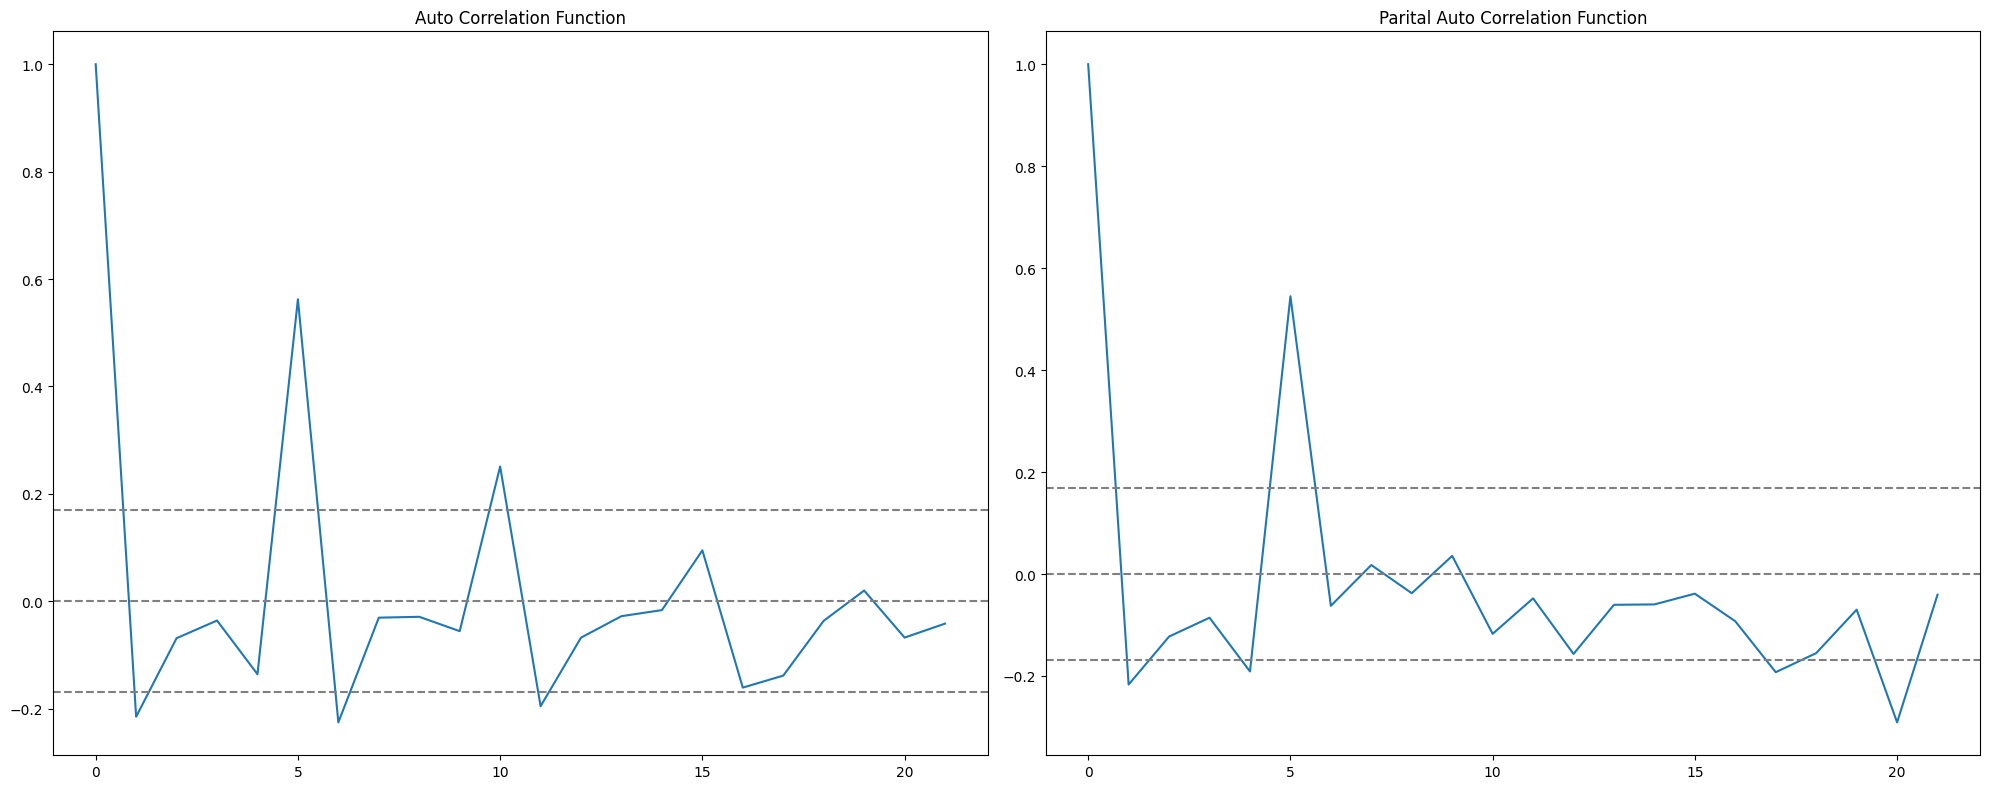

In [58]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(data_new)
lag_pacf=pacf(data_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [59]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(data_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

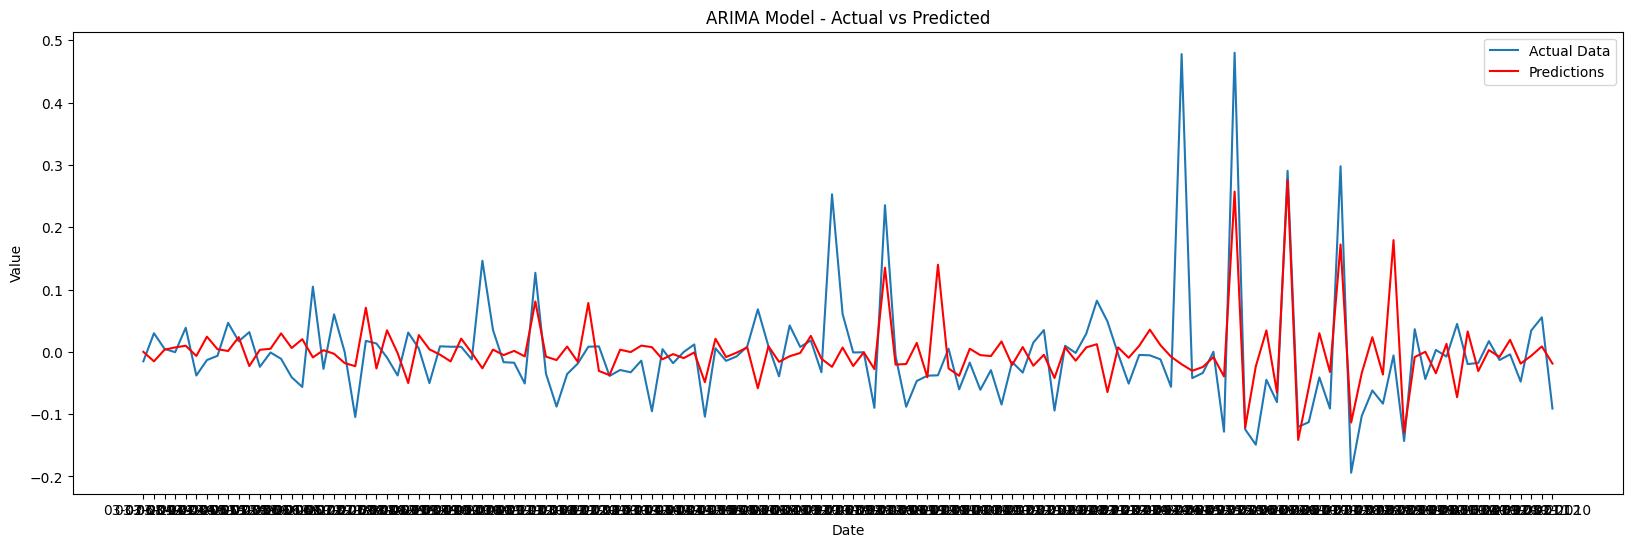

In [60]:
plt.figure(figsize=(20,6))
plt.plot(data_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(data_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.005806839300590988


In [62]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.07620262003757475
